# **CATS AND DOGS IMAGE CLASSIFICATION**





---

Sebagai tugas akhir kelas machine learning 

################################################################################

**Add DatastetFrom Kaggle dana atau google dataset**

---


if needed,

Karena Dataset yang digunakan berukuran besar, ada baiknya dataset tersebut tidak didownload ke local data, tapi diDownload ke cloud saja


Jika Menggunakan Kaggle , dapat memanfaatkan kaggle API

In [1]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 35.1MB/s]
 98% 266M/271M [00:06<00:00, 59.7MB/s]
100% 271M/271M [00:06<00:00, 43.9MB/s]
 99% 536M/543M [00:10<00:00, 63.1MB/s]
100% 543M/543M [00:10<00:00, 55.5MB/s]


**Atau Download Datasetnya dari google seperti code dibawah**

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile('train.zip', 'r') as zipObj:

   zipObj.extractall('train')


with ZipFile('test1.zip', 'r') as zipObj:

   zipObj.extractall('test')   

# **Import Tensorflow & Library Pendukung lainya**

In [4]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [5]:
tf.__version__

'2.1.0'

In [0]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# Load Dataset from Google drive *if needed

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create New Train & Test dataset if needed
klo dataset dirasa kurang

# Inisialisai Ukuran Image 

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [0]:
filenames = os.listdir("train/train/")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

       

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
df.head(10)

,filename,category
0,dog.2382.jpg,1
1,dog.2111.jpg,1
2,cat.2300.jpg,0
3,cat.10246.jpg,0
4,cat.5213.jpg,0
5,dog.650.jpg,1
6,dog.11756.jpg,1
7,cat.10007.jpg,0
8,dog.12287.jpg,1
9,cat.2334.jpg,0


In [0]:
df.tail(10)

,filename,category
24990,dog.8195.jpg,1
24991,cat.11645.jpg,0
24992,dog.7537.jpg,1
24993,cat.9094.jpg,0
24994,cat.2829.jpg,0
24995,dog.9698.jpg,1
24996,dog.512.jpg,1
24997,cat.9977.jpg,0
24998,cat.8540.jpg,0
24999,dog.9593.jpg,1


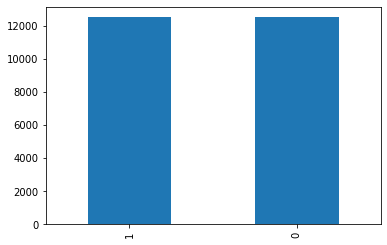

In [0]:
df['category'].value_counts().plot.bar()

# PATH Directory Dataset untuk Training/Learning

In [0]:
PTH = 'train/train/'

Sample Imange


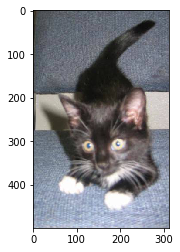

In [0]:
import random

sample = random.choice(filenames)
image = tf.keras.preprocessing.image.load_img(PTH+sample)
plt.imshow(image)

# **Model Architectire Dengan 3 Block Convo**

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding="same", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
    
    
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# **Reduce Learning Rate ON Plateu**

Jadi pada model learning rate ini kita menggunakan feature ReduceLROnPlateau dengan tujuan salah satunya adalah mengindari saturasi pada optimizer dengan cara menurunkan Learning Rate , sehingga tampak validasi accuracy akan lebih kecil dibanding sebelumnya


dan pada grafik validasi tampak terlihat pada beberapa spike


In [0]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

# **Membagi Data untuk Test & Train**

Membagi Data untuk Test & Train dengan menggunakan feature train_test_split dari library sklearn,

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

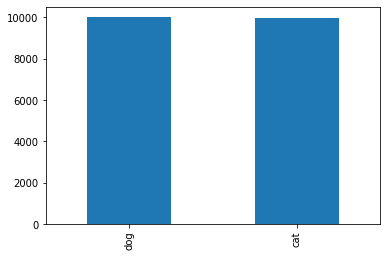

In [0]:
train_df['category'].value_counts().plot.bar()

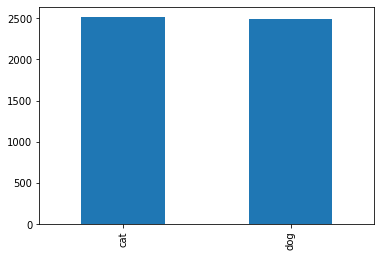

In [0]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# *Augmentasi *

Untuk menghindari data yang overfit dan juga memperbaiki akurasi

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [0]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [0]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    PTH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


# Sample Image hasil Augmentasi

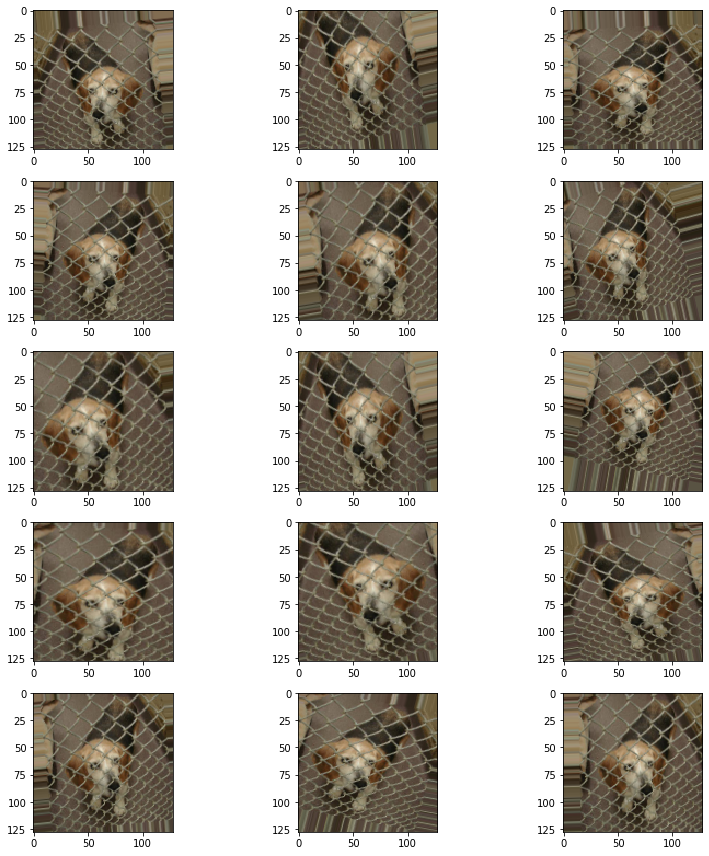

In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    #epochs=epochs,
    epochs= 50,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1333 steps, validate for 333 steps
Epoch 1/50
1333/1333 [==============================] - 156s 117ms/step - loss: 0.6967 - accuracy: 0.5356 - val_loss: 0.6892 - val_accuracy: 0.5115
Epoch 2/50
1333/1333 [==============================] - 149s 112ms/step - loss: 0.6651 - accuracy: 0.5911 - val_loss: 0.6282 - val_accuracy: 0.6382
Epoch 3/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.6249 - accuracy: 0.6493 - val_loss: 0.5957 - val_accuracy: 0.6811
Epoch 4/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.5773 - accuracy: 0.6973 - val_loss: 0.5075 - val_accuracy: 0.7542
Epoch 5/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.5426 - accuracy: 0.7249 - val_loss: 0.4920 - val_accuracy: 0.7602
Epoch 6/50
1333/1333 [==============================] - 150s 112ms/step - loss: 0.5189 - 

# SAVE MODEL

In [0]:
model.save('MODEL_BAGUS_13022020_valacc_08865.h5')

# **Plotting Learning & Training **

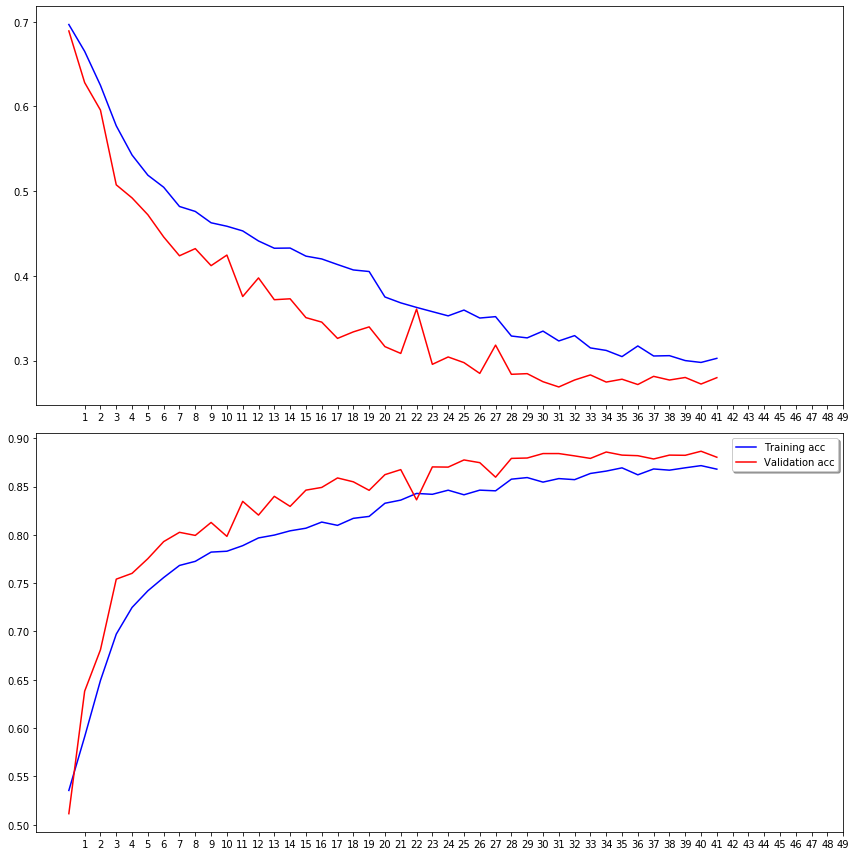

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Re-Continue Training/Learning

pada Tensorflow ada feature menlanjutkan dari model terakir, cara ini bisa digunakan untuk mencacah proses pembelajaran dan pengaturan memori resource

In [0]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    #epochs=epochs,
    epochs= 5,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1333 steps, validate for 333 steps
Epoch 1/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3667 - accuracy: 0.8363 - val_loss: 0.3884 - val_accuracy: 0.8288
Epoch 2/5
1333/1333 [==============================] - 147s 111ms/step - loss: 0.3694 - accuracy: 0.8354 - val_loss: 0.4025 - val_accuracy: 0.8240
Epoch 3/5
1333/1333 [==============================] - 147s 111ms/step - loss: 0.3626 - accuracy: 0.8369 - val_loss: 0.3889 - val_accuracy: 0.8296
Epoch 4/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3642 - accuracy: 0.8351 - val_loss: 0.3936 - val_accuracy: 0.8286
Epoch 5/5
1333/1333 [==============================] - 147s 110ms/step - loss: 0.3708 - accuracy: 0.8340 - val_loss: 0.3980 - val_accuracy: 0.8270


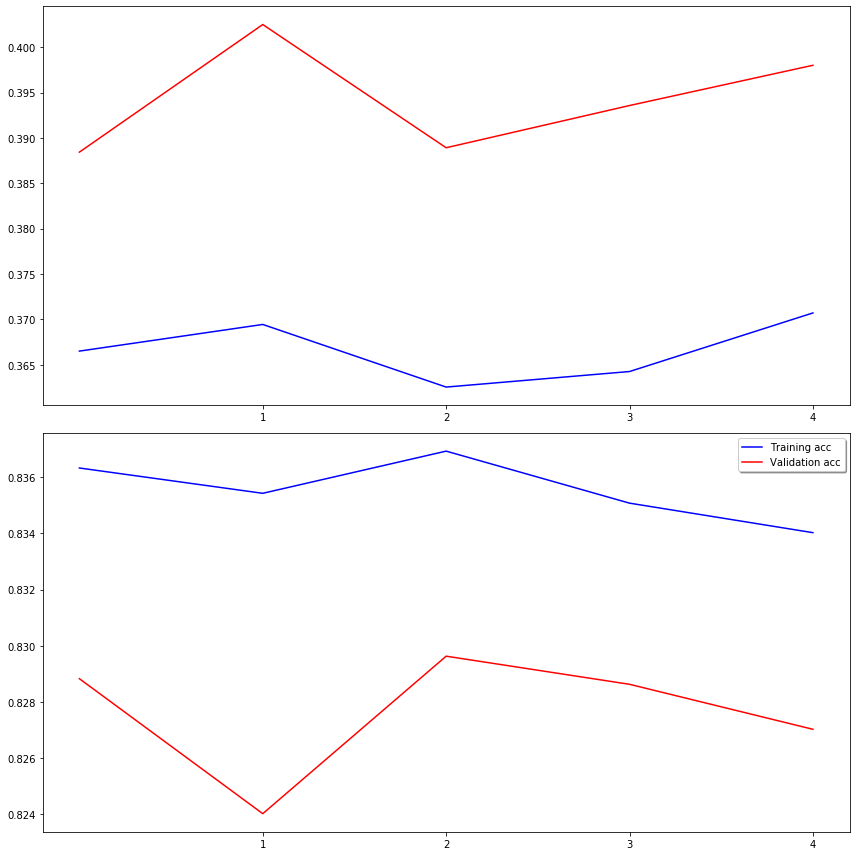

In [0]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

epochs=5
ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
test_filenames = os.listdir("/content/drive/My Drive/DOG_N_CAT/cats_and_dogs_filtered/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/DOG_N_CAT/cats_and_dogs_filtered/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# TEBAK TEBAK GAMBAR TIDAK BERHADIAH

**fungsi Prediksi**

In [0]:
def prediksi_semua(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

# RANDOM PREDIKSI TEST IMAGE KOECENG APA ANJENG :D

 IMAGE ---->> 2209.jpg


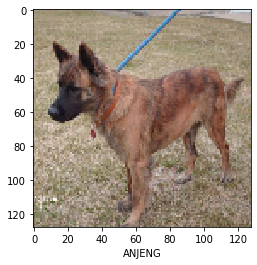

In [0]:
PTHC = 'test/test1/'
sample = random.choice(os.listdir(PTHC))

print(' IMAGE ---->> {}'.format(sample))

A = 'test/test1/{}'.format(sample)
#B = 'test/test1/10007.jpg'


prediksi_semua(A)
      

# Tebak Tebak Gambar di Inet

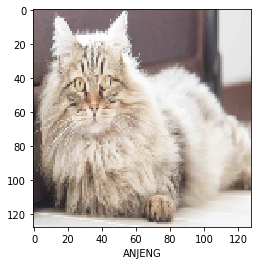

In [0]:
import urllib.request as req
import random

A ='https://cdn.shopify.com/s/files/1/0997/4496/files/Screen_Shot_2018-08-28_at_3.11.32_PM_grande.png?v=1535494311'

f = open('IMG_FROM_URL.jpg','wb')
f.write(req.urlopen(A).read())
f.close()

prediksi_semua('IMG_FROM_URL.jpg')

# **Prediksi Dengan menggunakan Model**

In [0]:
model_load = tf.keras.models.load_model('MODEL_BAGUS_13022020_valacc_0829.h5')


def prediksi_Dengan_Model(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model_load.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

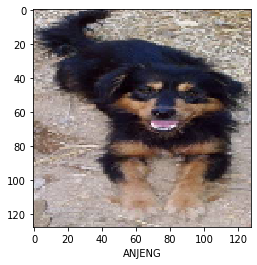

In [0]:
prediksi_Dengan_Model(A)

------------------------------------------------------------------------------------------------------------------------------------------------------

# **LEARN WITH PRE-TRAIN**

Di Part ini, kita akan menggunakan feature dari tensorflow Application, pada Cats & Dogs Classification berikut kita menggunakan arcitecture VGG16



# **Install tfds**
karena kita akan menggunakan Dataset dari tensorflow Datasets

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Membagi train, test & Validasi

In [13]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteTMNQBQ/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


# Melihat Sample dari dataset yang kita akan gunakan

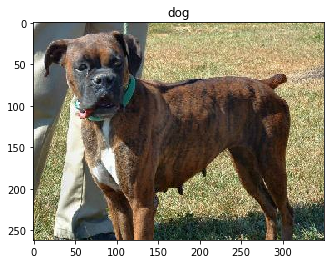

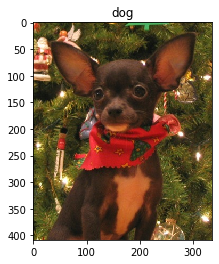

In [14]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

# Fungsi Normalisasi size image yang akan kita gunakan 

In [0]:
def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/155) - 1
  image = tf.image.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

# Inisialisai Batch & Suffke buffer

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [19]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 128, 128, 3])

# Memanggil/ Menggunakan application VGG16 yang telah disediakan oleh tensorflow

Secara architecture VGG16 yang akan kita gunakan sama dengan yang ada pada lietrasi, namun yang beda adalah disini kita menggunakan weight='imagenet' yang sudah optimasi dari training VGG16 sebelumnya *oleh team Tensorflow

# 1. Base Model

In [10]:
IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

58892288/58889256 [==============================] - 2s 0us/step


In [20]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 512)


In [0]:
base_model.trainable = False

In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

# **2. Global Average Pooling**

In [23]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


## **3. Output Layers/ Prediction Layers**

In [25]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


# **Menggabungkan Base Model, Global Average Pooling Layer & Output Layers**



In [0]:
model_VGG16 = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

# Set Compiler attribute & Learning rate awal

In [0]:
base_learning_rate = 0.0001
model_VGG16.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model_VGG16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
len(model_VGG16.trainable_variables)

2

In [32]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model_VGG16.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 1s 70ms/step - loss: 0.8209 - accuracy: 0.5188


In [33]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.82
initial accuracy: 0.52


# **Training Model**

In [41]:
history = model_VGG16.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 43s 74ms/step - loss: 0.2249 - accuracy: 0.8999 - val_loss: 0.2308 - val_accuracy: 0.8925
Epoch 2/10
582/582 [==============================] - 45s 78ms/step - loss: 0.2239 - accuracy: 0.9003 - val_loss: 0.2299 - val_accuracy: 0.8912
Epoch 3/10
582/582 [==============================] - 46s 78ms/step - loss: 0.2227 - accuracy: 0.9010 - val_loss: 0.2290 - val_accuracy: 0.8934
Epoch 4/10
582/582 [==============================] - 43s 74ms/step - loss: 0.2218 - accuracy: 0.9016 - val_loss: 0.2282 - val_accuracy: 0.8942
Epoch 5/10
582/582 [==============================] - 44s 75ms/step - loss: 0.2210 - accuracy: 0.9020 - val_loss: 0.2274 - val_accuracy: 0.8942
Epoch 6/10
582/582 [==============================] - 44s 76ms/step - loss: 0.2199 - accuracy: 0.9025 - val_loss: 0.2267 - val_accuracy: 0.8934
Epoch 7/10
582/582 [==============================] - 46s 79ms/step - loss: 0.2190 - accuracy: 0.9024 - val_loss: 0.2260 - val_accuracy:

# **SAVE MODEL **

seperti sebelumnya, save model kita gunakan untuk mempercepat proses prediksi saat ini atau yang akan datang *dapat digunakan untuk prediksi yang akan datang tanpa proses Model Training terlebih dahulu , sehingga akan menghemat waktu

In [0]:
model_VGG16.save('/content/drive/My Drive/DOG_N_CAT/BAGUS_VGG16_val_acc08968.h5')

# Plotting Model Train 

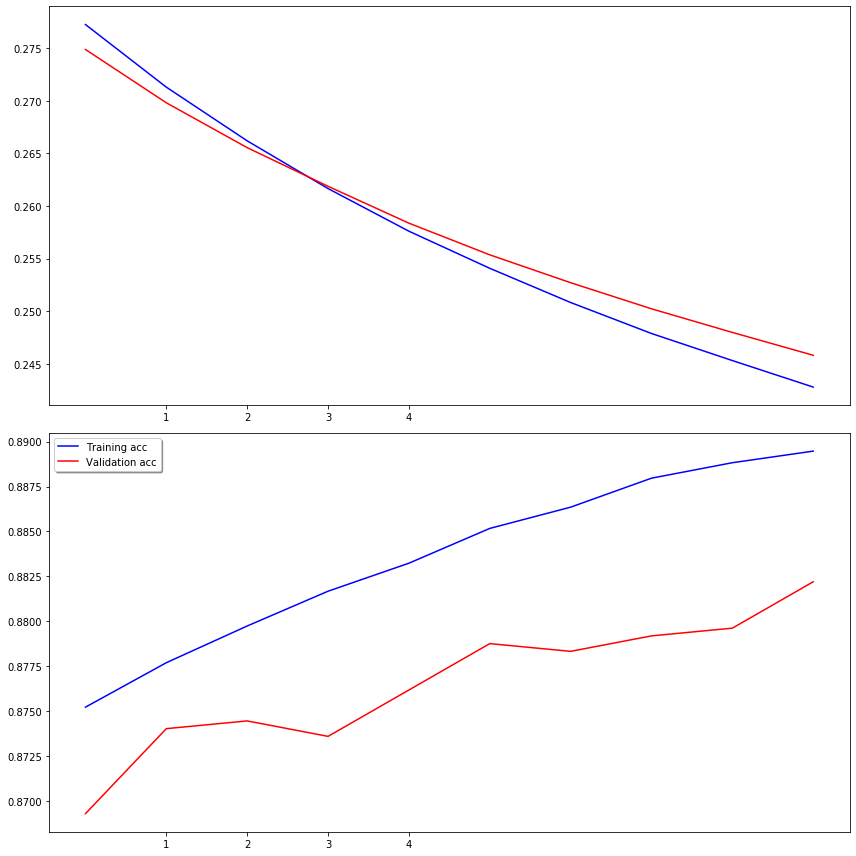

In [39]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')

ax2.plot(history.history['accuracy'], color='b', label='Training acc')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation acc')

epochs=5
ax1.set_xticks(np.arange(1,epochs,1))
#ax1.set_yticks(np.arange(1,1,0.1))

ax2.set_xticks(np.arange(1,epochs,1))
#ax2.set_yticks(np.arange(1,1,0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()



In [0]:

model_load = tf.keras.models.load_model('/content/drive/My Drive/DOG_N_CAT/BAGUS_VGG16_val_acc08968.h5')


def prediksi_Dengan_Model(x):
  img = tf.keras.preprocessing.image.load_img(x,target_size=(128, 128))
  img = np.asarray(img)
  #plt.figure()
  plt.imshow(img)

  img = np.expand_dims(img, axis=0)

  result = model_load.predict_classes(img)
  plt.xlabel("KOCENG" if int(result) == 0 else "ANJENG")

# **Prediksi Gambar demgan Menggunakan Model**

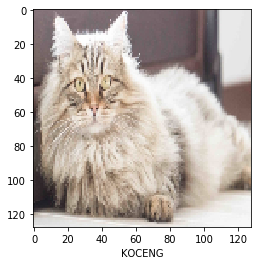

In [55]:
import urllib.request as req
import random

A ='https://cdn.shopify.com/s/files/1/0997/4496/files/Screen_Shot_2018-08-28_at_3.11.32_PM_grande.png?v=1535494311'
#B = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExMVFhUXGBcYGBgYGBoZHRcaFRUXGBYYGBYaHiggGB0lGxgZITEhJSorLi4uGh8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtLS8vLy0rLS0tLi8tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAK4BIgMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAEBQIDBgEAB//EAD8QAAEDAgQEBAMHAgQFBQAAAAECAxEAIQQSMUEFIlFhE3GBkQYyoSNCUrHB4fAU0TNicvEHFUOCohZTY7LS/8QAGQEAAwEBAQAAAAAAAAAAAAAAAgMEAQAF/8QALxEAAgICAgEDAwIEBwAAAAAAAAECEQMhEjFBIlFhBBOhcfEUMoHwI0JSkbHB0f/aAAwDAQACEQMRAD8A+NxUgiakpUVe2AbilC2tgRorDsE1N1ANTw665sx9BIbyihXzR3iW0k6AdzRmE+Gn3LqASDoIM+1AmjsUHJ2ISzaqSg1ouIcEcZ+YSOo286VOt1qlYc7i6YuzwavbxVUPi9U0yrMqxn44qt5wG1DMMqWQlIJJp/guHNt3cOdfQDNl85sKXPjEKGFy6EaMGtXypJ9KIRwh0/d+taDF48xASvTqI9kipYMLJSjw5UqwJB6TMbwKH7rq6KVhV1Ykw3BHFEgjTYX127V7F8GcQJKYHv719A+H8ApZyslASmYzGS4dCtUaJselc+IUBbhEpA0IBmY8hGwtXLIzOK6PnJ4W7EgBQ15SD9KDcQQYIIPQ2rXHDQSmEryGOXlWkagg71B2FJ5h4qNzELR/qFB/ENOmhj+nTVpmSIqzDi9apXwu24kLZUb9bileIw3gnKoQfz8qOP1EJ6XYqX084K5dHEGBVPiEmrfGChaotovXJHntU6LCnloA0z8KgXm4NckzqKQarirQK4U0yI2EqRSdanFQi9TWKIf4OqTUclWNCuuULexXLYPNE4XWotsUQlEVzYfJBLgtNAOUa6qU0vOtctiookBVzIqpIqSFwaINHFJvXqszivVgRbjMOAJoRKelELczI8qAzdKxWL2EuqOlRbXFUZydakk1tBIe/DjHiOibgCT9NK+i8F4epxJWedINhmhSem2m96+ZcCx4ZdCibEEHtO9bjgmOUSVNLbj/ADqIHlIEbaGkyVMpjXHQ2xuHCVKSiDI5kEhU7RAHKT2MSNNxhviDgxRLjYJbPTVHUH+WrW8RU4ClSwL/AHmyg6/QjtFB4PErK1QkmdosoxEx+fnSJT4u0NWJTVM+ZLSVKgAk9BemeE+Hlm7hCOxur22rZHhSkZUIaKFKUoEoSkK2IAUo22vV+G4I+CtPhNsgXLjhDqzbroKY/qVWgYfTb2JOH4FlH2YUSoxJBTJ7TNvSnTDzKOUJyxsQPcmaH4pjUsuN5lOFCk/4icoHUFBSO0ValDTt2sa4bAwrKs69FCfQVPNqe5L/AJKo+nUSeM8Qc6UJW31BG1VNqEAqIKlxPZJMxI05Z6zReAwLKHClzEZ1KEAZPD36WBMkDSma8FhlZ0FIGvMLafprS7UQm3JbFjHG1SW0lDaTvpp3zD+DSlmOIZBV4gUD/l6HqPP8qeNcOYQVIWkFMWcGokb2+lZLjXDVBKylwLAvAJIy6zGkjtH6VXjkmSSVMHZxYUcyjllRyrGqTYQrsYFGKzA5wB4g+YDRaaGbFsqkgKA0HyuJ7dxUsEspX4exEoJ6bp9KRPbbRVDSSYxweB8UFbLqm5uQNJ3tsaE4tgnwmHgHED74HMnuetT8ReGczoIyr+YHQK/enX/MnMgW40Cg6lBmB5Uu5qpLa/ITjGVxff4MH/RFKuoOh60elsCm3EGEEZ2jKOkadRStaCatxZOZ5X1OD7btdFClXrrjMpmoLbINGtXSRT2SiOKocVFFuoIJoNaCa5BxVHmzNXhuajh2O/0oxnBkmy0+9ZKSGOaoiGIqbOFG5vVuLYywQZAjQ6qNVBvKkkm+/n0pNtiItFv9KnrVTjUd6pykCTXg7WrkNUUwrwpTagFJgwaY4Zyo4zDg3FdGdPYKdMXKXUEoJorwYuaqdxEaU+wy0Md69VQePWvUIJzCTcUM8IVRbJCa9jUDWi8nAoVUDXlGppFaGjtaP4bSotrUTCUkATpeCdLjzB6Vm4k19A+C052fBUkC6pzCLH+RFKzS4xHYlci7hi2zAK13sQFKIE+n1k0+exzeHRDeUm4zb+p3oXEMs4blRzdZggeQGlA4FtKypxZ5EEQLCVH5UxvcioMklJ2XwjRLEv5h4+JWuEnlbQSCekxcybUpxfD8bi4kBln8OY77q3Ua1GA4Z/TtrxLyfEcKlZEfMZN0pSN4G9ZDi/DOKvQtxC20KNhISAJOoBmjxp9pr9X/ANATa63+iGmLYOHaYStYcShQ5lbCIASNhEn0oXjHw+yohwOoaUo3B+VRtcdKrx2BXCErfCwgfLG5gHMrbUi9UvcDaWwnNiQVAAoKiJSCJykbjzoYuqly/AyStceP5GeC4fiMsKdQ+yBtzKRflUk3MAxvVrwWqUKJS6NAbBQAkwrRXt0pb8N/C7yFBxONZaUDbmmRvb+a19E4xwtfhDNlzkDmSLZvxJ9qLKq2t/0Fwl4ejG4XiVwhwAi3KRbzA696cDBNBJcZQqNVCAq28IGk0pYdTim3ApsjENklQ0zgalI30Nqv+H+IeCqUklBtaD79DQtUa99GXxSDABJH4T+FW3ptVDiSsAfKo3SfwrTqPWtb8YMtqOeIz99+t9PSskP8PNukyfNJvWwegnsccIWnEp8NwQoWUOhG4ohXDMRh/wDCJW3+H9KG4aEFxD6Pvcp/fvW3wbthSJZOLpdezGqHJW+/c+c4zFJCpEozWUnZJ2IqlyRb1/vW0+K+CJdbKkoGYaRasaymWxPzXF/xI29RVOLJHTRLmxtpxBFTNFYc1WG5q0qy1eeQdfbTrFJ8YQBpTVbkikGOXzRQpbCTPMYiOtNGVpUmwPfLrSVsTv70wwgcQZFqGdAtbCcMYOuaDyjTmNhI7VzFxMapbsT+JW/1qtT5zSBzdek9a8UBUJFkIEqV1O/9qFGLsHCirnVpt37CoB6T0riyVqAFhsOgqacGRClWG3U+lHryPWuybTkGjQ5ahXW9uldCtqXKKMktk8TQDyAKZJam9BDDLUrQmmRkujU90C5e9ep2ng7kDk+ldrOa9jt+wkxBvU1OymKpWJqYRApjOory1Mi1dUg10V1mrRBCa+pfDOKy4TOBoIvaI7zpXzdtua+r/wBMGcG0Mt1RaBoNdbH61J9U7SRT9M9tiLCIdxC0hsKMq5l/dSN4nU7UdiUZsazhGR9m2oKX/mULkmTeCaZO8WRhQ0Mo+0WEnfKI9BrFquVwADHBaXMpfQuI+6coBIuZN6RGSva8aKpbWjQ47i5awy3WEB11Sy2ykCQVpmVdgCDPlSfheFxWMzKxric7ah9igwE2F1AakyrXtSjCDG4dxhBQQMM4vlJALra9VJSfmInam3wy6Eu4xalfKlRE6qDklJjpFvSqXBKFE6bcrMpxwLWpRS4EMNqSVgD5lBRt9E/WhuHYKCFpLa0kFWVcAtwbJkbXI7SKEdwznhNpUoqSnky7BYErcJ+8cxKfIE1NpCEQYMrOU3sqQUkEf6SPadqm1FcUyxK9tGsx+DwLuDYxH9KCFylQBy5FAwqD1kGOtE4HGhA/pUOLU04wXWVKMqaIJhJO49f3WcExyEYJeBILhQV5NiDMgz5EGl+LfSwkJcV4g5UOBKjo2kcloIuSojqaohUk14JJri17lPDEFzGM4lAIC8xWIiCmyoJ1G9MuI4HDreUlBKHSnMcpsbwZTp9K9juLMlGFUy34bSVFVgYhXKqDuASJvSNtRHE1zPMg5b7ECP8Aalzi+XfSGRrivljjH8PK8KHBcokHqI1BH61ksMftFtnRQzD2g1tfhDiGfxsOoWUSL7kzeshx3ClpzMP+mqD/AKZoVGnXuEpWr9hbhH1YchYnLJCh3Bre8G4ulaAsaaetY11sF0IN0OQoeY19xUmmCGHkNqgtrKvMbVuWCyK32FCTg/g+nNYgKTEzWF+I2S26VAWML0sCmx+lM/hPiHiNJJN9D50VxXC5ioZpC0kAGpYf4c6Y2VSjaMw8QNP5NDKE1Ja9AdQAD5i1VE16+P8AlR4eVetniRBrP4o8xp/oKRYhPOa0BHWk9qPYVCTQjZovDoJsDc0ue0Y9lPiXkWPTY1f93INzJ7nYUUcAgFJWSQZnL2prgcEyVco0vJOoOlDdBwg0xK3hw3c3WRYdPPvRHCsMtc5gVHYH6mmnEHUCwSNdtT60K9ioUmLEbDW9DLaC62yTXACpRUpwCTpV7fA288FRKQmSepOwoZ58fNJB+tQaxBI5la+9a+huhgeHMgzm9KtbWlGhn0FBugJFjm30/Wq0Qo6aV2glFJ6WxqeJDpXqC8Pt+VeoOUQ7fsZlOCmurw0CaKW6DpVS0FXlTFJvs89Sd7BVOyNKGm9MAztQ7zBFMTKntDD4cbK3kJB1MaSddpEV9O+MMQQ2hKUgJBCRJgqI7gwEj+RWM/4d4NPj5lfdBIsZNuu1af8A4kKIZbAsYA7i+wGh0pE3yyUOxajZn/iVZCcMU80OWPUiLAU74pxpaH0KByFtMEgSVZgCsC14TFhqTVeEwKRhMMSjMsPpAJ0SSeb8oqrjaFN4g5sqQtAU2VTYzBF9ZmPSlNNNV4spg0+/NFGMxLn9SVLxGdByuNLJyBxtQsQdiDt2ijvhnjgxbquHvuAqWIbeSIzmCSkkWN9OonzIAYIVkhLjZUr7M8yUk/eSJCkE7waj8WMtoThncI14LyDmXBUYUkpKVAqJ9u5p0Jxk9vvwKljlH/0oxDRQpbJOYpWqb2JKzMe5qOckkSBl19hVLDynFZj8xMkm1GrwZzL6KSJ8zN6hl2Xrohg8altnFPEy6ltIaPdS4mNyJHtQmC4XilsJlkNoKf8AHclKcpF1ydTG4kmlmPwhgpk7fT/atbhFrdZaClEhtASmSYB69v2qpTjGGyWWOUpuhXi1hQyhR8Ntvw2gREpF1OqBFipUmDtVzTYUcG+AQSckncKCo/ah8cguLDWiXFJClAlWcbhIAnQRtT55hsFhptYhLqQU5pyhsEx52Nd/M7Mk1H0mX4S6trHrEwQsiI1E03+L0pS8sxIIBI7Ef2pdxfED+unfMRcegnrprTv4t5lNqvdAB6H1o8y6AwvZjVoUEEC5ZIUk9UGmrvDUqJeaXCVJlUdxQ3CTlcU2ofKCJ6oOntTtr4eCOdtZCCJy7RalOVMdXuIPgp/K4pvva9bnHYckIWCeW8EztWN+HsFkxbo1AOovqa2eMkJzZpSATH9jQZ1c9G4n6NnzzGrheb8RUf8AyNXJ0q/iWG+zaURBOYx2KpFDsrERV2N6PKzr1tkTS9xg55FNctAcRai9FIQ+jjjaQnbWmHBsqZC7FQ5VdO4PWkoUANZPSizzJAm+1L4jMK8jBwDMU5syRYK0muYdeQlRNo9z0oZD2aEEAR3ia62lMQo3/lqF6Ww5N0e/qFqVKZnSrf6JQ51KAOtzc+lc8fKORMd9TVSmVKOYmB1rrsy3QQ0nOlRNyLzp9KoScoEG/e8UWwEQBmIBBv1gUufKQYJUD1oe3SMd9roJGMkwpIE9KtedIsFW3oRSrBKbnqRROFZ5gs/KT9RrWPWzeU65M4eIGuVc5hTJgiJMXr1BWMZx+WLkpq0tE6UWptGWaqDyRcU1vYrKlF6PNNZdapxKL1YtwmvITIvWpm4ZNx2aL/h642l0lRueUdpIvWj/AOJLPInUkiB2H9zWQ+HFpQ+g2+YT7/3r6N8Vt+MyVDcW/m1Bq7KodUJ8IuMAkiPEbcS7lBgw2QFAEdjHpXcbx/C4keF4QeWkApjlBzRKUqsCex1rKYbivh50lULQkgHYQnSCdzaOxq74Vw/htqD+UtrJUYN0K+6oKmB57U1pds5N+BvhkFJUotKRJhXLHQwRqT7A0N8RKC1JiRlkmTewv+tWuKXyIyKKlDOqSSEhRPMVKMFZCRH4QBQfEAkiQICARHSEyPPeo5x4T0XYpc4guCgJE2IpqnE/Z6nTXt50kwhKyJFr30npTX+nlMTpreAe1BJLyNTFmNWJzAgmdIsADajcO6Q2b218rXsNvy6WpTjWABym8ifWR+cURgMQSjblMabX2NMlHVi090EYHDYggraWhJUfDMrElM65fxDqNZoNbCcLjlEKJCW1KUVfiNr+d6txWHaQMyQlbi4CALlJSbqHQAED07UDj8OpcXF/mUBnzdSpVkpHrFV41ohyN8nYbwVgPueIeYH5h5yAR0MgifKmXxc5lLSZmBr2BEyOtWfCWDDaU3mCQSRsodjBHqaXfFrmdav9J2/eDS8jt0HiAccrKtt3pKSOo1/KrcHxN5l3wFXbV8pP4TcXoN5XiYZK9wU/nB/OtDjEtpweHdPzjKB+R86CCXT/AEGZH5RT8JN8zzhOrhT/AGNNuJqz5cOhQJV8yhfKN5jes2cXCUtIF3CoqOkDNMitFhQ0w0VKtuSTc0Uo7sUpOqE3xQ4gLSyn/ppANuul6QOIIuKctsLcbexCkkBSk5ZF4G9Dhnlmji60S5U3MCYxNoOtcxvMmoFkTE0ScASJonLYt4n4M6hF6ZAARAkdqniMLlOlQQ8EynLsPz1ruVvR0U09nYBVf3/SjP6RKIVJUY0BoJh1SjAiNCf1orxAslog5QbK3jeaXLlYS9yKCAO9/c1ErUTzbVJ1CdQcwv5dqkYJygmQP9/OuujXp2nZVBUoAaaDbzip4TCeJnkG2n5CuFfaNp0ozhbSoUESCAT7CaGUmkDGTeqGfCuDNBJ8ZwocyBQgA69uulClnMkKkAIJuQRmvqKXoLhVmBIUACY/f8qMXiVBrMpXNnywdgQSbe1BKxsp+lqtA6saubKttau0N43ZNeoeKJ7kXpRNDYlsa0W7Y6VU/h83WJAPS5EntTVqQUo1JgRdVIAFXO5gNKYhtCdBoIG+9XcLwfiOEKEjKVDoIrnk30HCNAWDQpJComL19G4FjPFYMkSLAT0GpO2381wCFqGokGth8IphKe+ZV/b8qycqWyyELMt8VcKbQ6ASvuG0TJN9SoR7Ux4fgHfCgFfhkQEeGmQD1PiWO9q3GO4chagVAqVrGp8z0Hc1NT7LTJVlKlR8ok2mBcCm8m1QHyYjB4otoWhsZnAQkKXIAJGUZunQQYNW4kw0nOCVqMGIg2sRGxpjwziCPFWsMJKMv2iEi6gD82plSTf1oHF4AOBTmFWkspI+zWSFIIABTBEpjTvNLywTdj8WSlQm4akrcU2mTkMGdrb9hFNyFDlJ/Pby2pZxTArWo4jDDKtQAdRMiQJuDpQDPHFpkZlIUk5SBEexmPStlivaChkvT7DOJYTKhRzDqRIn0FUYPFFKUSMoUJi1pJE/zequF4NzGOEiQ0k3E3Xe/nNG4t8JclSOdCYbayxBBIByCZG961w9NMFzXK0T/wCSJUgKUothSidhIkAhYn8YJBg+W9F4LCSC2oKy9wEgEaHKkk3G5UatwgKyUuAJvKkj7gMwkk26k+YoziLhQlKUcxWQBePUE2PkCaNN1RPKm7GiGMjZAPSFCBNu1YjjJJduSdr9J/sK+inDZWgjS36dK+ccZUQuDqLz9bHoZ0qeXZRi6BeFgpaeSBORRgdbgxRmNxyngwnLlSiVFO1zb6Vf8Pwl99RjKEBQHUxFL8E/mCyTzFUj00HtTIdtgTfgox7WIWsBqwA1p7wH4YUtQOIcK4vlHyj0qlt9KeYqCR56Vx74tUCG2ElZNs20mffQ0xNvSFNJDr4tfCQjDNEqm5A2A3NZVYUAK0pwpw2GW8sy6sanW9gBSDDGICiCN/550ubSVoDJLjFtitxgTNEf8xIbEHT89qqfbzOFBWYtHSQBY+dLn2ihWVQiiVSomWZ3oZY5RIEkkkTrSomTB9+lEKcUq2saVW62qbDz/eigq0EtuybDIv2uL6xUEvFQPXoK6AqYgzoB1qJaUJBT6Vuja3YZwtlNwtRi5hMEmNr2FGOMgoUpnPy6hQEhP4gRS/h5gLVsEq9zYUTw0L1EpOVR9huNxSJdt2dpJuXX5GbPG82FU2tAJ0BjQgW+lCcJx6kcpNlApPcEGhcNeZUMsk6xeOlDrnOJNibUXBPQVNSRa6sk2t2HfSvNrsQTHnqa8XQlYtPeq3Wz4hTFwZTaQQetdQl3zfsj3N/7or1Ff0yd1InfSvV3JBa9wx0FQmLAE+oGlcTJSVWy2vOsjQDU60UokoBMRlhIBgDliSDvSvBNEpMQANdBA0nMdKV3sW1J5POwl7COJQFKEJgGfMxH7Vbh8QQBFjEHtO1QbSW21JDnOIV83LEWgdbm1WYNGdKlrSoJjmUJ5pFgmbTW/qPpp6DnGhlMwBGvSNR3MVpOFIUhttbSSpaUggHcb8o3PeazXDRmIbEEE6nVKQdNLems9a3vB0c2UC0R5gfl096VOW0i76e5RcjrrwdQSFZ4jMhJAynWCdBHb3pbjcKSnmPJshNgY2g69yf2o/i3B1oUX8PyL1X/APIBomNjtO2t4qng3F0uqhSMj0TlVaAJlQHSQqP9JO16oK0LnoUYnBqUmM3h5IWCnUEaX7C19ZOgsUmO+0AcTlChcwpTa1p2m8EqM3/zDWtfxPD5wUpPKTJ/zGJGbtEkj03NYTj+HKnQo5soWkkC5IHKk7dTPYjpTl8gWa5hwobnxXEpUNFoQSLbLGuh1rK8aXhnFBZCVFKgo5bQlJuCZvppfSmmI+H1OI+dVwVkTISEzIH4jO0RY+dK8B8M5ozwD8wBkaGCCBrXKjAvBcXwwKm9rCLoEW3T3moYnjbaVZWkpC7wlCMhMC4zqJVmi/vRvAPh5KFKWpIsAsDUHMLqgibXH+1C8awTaXc4jkM7gjcEXg7fzTtHeS1khtHiJMFVzJiVHY7Am8HQxsRZhwJhSll1zliySDyqHcHQ6SDOm9oQcPSt95U2ZSYI681x9AfQVsuEtgyZ5BZPfueliPqPIJOkatl3FsWfDI3AiP7HavnfFBOa9oMHrbQjrathxt8FfhJ1SJnoNwobgisnigIWYsom3SBYfzrUzeyyCqJNqJC1KhKmRYbz/tSxsgG4iNDRrGLzKDYEANoTpe1/SuYzhgJJzGwBgC97TrenpqOmSSl5E3GMQFlKYm8T3OlO+FPJZcyBqShIAVlKtrgRpcmuMYNtImSTrcQbG2vSmriHsOojlUAbC4MESD0NornkT0hV3LlZdjCpTfj4kwQD4bY0HQkdayIWpZCkz2/X603x5dfkEqKugFkz2/WhHsApvKMyZEyDfa87CglJAZXegbEoPzkBPVRtJHTrXY8VACxE/Ir+bbTVT7DrigYkEgDcQYnTTypkvErWPDyqWhIGVQ1QoCJB3k6jvWPSX90BHHGWn34FjGHAnMYi5IvfpG48qIawJy5ipJIJ0Oo2+u1F47BxygSB8yhofSh0vjniZKQIgR38zWc21o6n2DpZywvUnQd5ubdKtxmGUTmFybZZvH5C9taniHgCZJEjT846elcwIStQ2y3OsQJvW8nVnQlL2K8IypIWVC8pIE6dvrRbzgCjayUQb65jJqa2ytOZIATIjNqbxMe1SxODWoEE27XNzJ8rCglJN7GNNVYuQM6uWxIt7dNh3qBwxglXNlgAd+/bSfSj8pbSSgHObeQ6mpKdUCBFyABvROf+k6UrWhQ+nLKsvYTYVc1ilEBRACojXbYCrcegnkgKVueh6DtVJw6QqDrHNvfSBRKSlHYKbl2U5v8AKPevVbCBa/vXqKkBx+RpiseVApEcqbCdt9dTVS2gUlInw5SQdyYknzvHoKpW1yhaSAoaSD93WZruIezhU3JvYnlgaRoRS4pJaN6WqJuiAEt8wBkjQkwYJB2gxV7COQFwuSZyERl9T1mgUEptcKUIi+m8n1070Wy54jYRBGUbXjcgJ62muaCXJuvLHHwuyZKlT2k2udQNrfnX0jgOGMZot1P9q+fcHwyjhwR8+YlM9RaPpFOBx7HAANYQ2EklUXiTA61Mlym37HpwjwxKKPoL2XLeANTWN+IuFyFOtwHFASeqUQQmdhYj1pZ/6+ylDeMbLZUJJvAvYE+XYitA3i23EjIoKSehBsRPraKti2idox+B48oK8DEDK5cSbBZgFcbbgd8pq/HsZxbWjuN8IQ8kggHvuCdwdjSHhri2l+A7/wBipnMBse/bvTrsVRXgOJuNrU3JAVyp15UjUe0+9GO8TUMokkgK9CSQmO0XruOTlPypUdROu2h/mtLsY6AvKQUkxrpp/alyl8AylQS7xYoBUVdLe6VekEe1Lns+IIk5Uza/zWkj6UO2/ClSCdLiDIHY2IudIq1a5RYgxdEaSOvQaj3ofuUxbyUH4NwJdWBOXkIT+IiQJ7bntWgweMhAaRJUZvtzG0k3MARWSW/mUFpMAhIJ1JAvInfvTg8TaQAUSVkEfLc3EBQJ3FJ5Ns3DmW7YRxd7Kkgf4hHzGObp+v0rPvsyiCQBFxv6dx1qzE4gWUrUggbgbge8e1DBaoBMQTEDaNZj8qXvwNlnlxuLJ8LaIMhN+5+UdSo1TxRslaSFpKk7Sb9pivOY1V4UI7zsIFCFF4Jnvffc7imx5N2xMZuS30dd4i6VQjQibjSdNRanLxUqHHCYsAkG6soFh001pT/WhKxKSo75vvGN+1DvcQJMkyT6eg6CmrHKTWqQSXjwNHXVLJ+VKLjLp7q1NTw+ISkpzlSgIgaxedSZMi1AcPWSeY2NjePm6UxwwQApKivMncGRbSx2rZYYjVGL20UvhKnFBMhPMUmIiTKAZr2JClNpMzBVOWSACPQCCO+tENKcGYpUBIKdQNR3/SoLSu8kyoaGRe8KnTalSg07GqK8Fbzyipf2c57TPQfhGm5mpMYRCkXdyrAPLlPmBOgopplWQKJy7K1EgCQofi/alYSCFOKMoBgWuoi/L270pPk3RPTcm6OFkFRBAJT0gi3QHaKIcWgITkgFWpvNtQfWgji4AUokgg/LAIkkRMVNLVwlJVO5Jm41A7A6mmOOthxjxTSLG3wVEaxrG/vVgfBJPNJgWIIsIt9Kk1w+TNiDqcwExsIqbuHQj71j8oFyOo96Ryi3SEwS6RU42TeAJtbr+tXYwKSEjKo5ZSSIsQo1cttJWIJMRCRtvmJ2FWg5lZReSZUdCSNQKxStdBKNxYmWLlfOFbaR9KocwxSMyhE3F7kaSfOjm0JDgUST6+wA86hjQlSjnzBVwkJvIExKbQPWnKVOhTjqmxVnHQ16rEtnquvVRUQftR+QhpCwVZb5jN4Ig+e/lUnXiDlTppEC99xUAUyLyReU9jv6URxHDJTCkk3JN9p0i0EUm9qwIytnEYtavs1cwtAn5b7STlH96tw4lC5ScvNl0MqSkqI0sMs+1VcPMlOa3MlURrKwL9BE+3eu4LGw8tuQlpZyzBMX5SIvMW9TO9HxstSi2rNj8Mphlryn6f3Nap1YKdfQb1n/AIdb+xb/ANA7evvR2JdUJI9OteZJ+pnrxjaQFxbB+IClTc6QDeesTp/LzWO8JeGJcYWQkEkp27QNrVumsYtaSFCx1JA/tA0/KkvFsIOZQ1Ikj8Q/EL6jcb69aswTrRPmiMuDcVD7QVodwOtD8YQkp2zi6ex96y/wzjQ2taSqRPSIk28/SnGNxZm0CAClJ+9JINulVyklohckCcSxRISREgk28qCxj6XnMxzZALWiTF506fWifEHMpxWQXgEXPSRtStzENzlSVG+g08+1Jc3ehM9O0/6E3khIgSRsQIm8yCfz/vXcQsTKkhJiIEwT11t1qGKeiQBJA5ia8h4+HY6QYP3RQJ6smdvZJGKypSI5hckXNvpFVsJCrQZ1tbMSrf0r2JSBcAi0qTrBOl+h6Va4QG8wiTBCbyD3H0HW9EnaDg0nvZPEtgmFyf8ALpFrQLwIodT10pgb2/UnckRXUKHLokxeYkxrJ6UC+NVAkft9a2MfAzje/AU6+kEpy5e9zNryJNCPAA5Eg3uJMESN4MVUl4KVKhmsZ9RrURlKuZRi/megp2PFs2EKdkVrF99qrR1NRXG3vUh1qoYFhckFJjt+9NsM0VpCG4K1HmJEAAbBXneaRFMTOo9tKZYbGEIGUEEXmdOtqCUbDi6LXFKQopWjS0z/AGsRTXhb2QFak2gEQYubhIi0mIPlSXE47xCc55oER+XaqxiVQEyqEyR5nr1pOXHa0Epj1rFOOKcWuBlQowflGYFI8on6UtDZlOZM5TGQRBtcEHfWrGOJLCCiCrPEkiZA2ijsFxNYIBgIgpFhr3HtFT8eOkhsHGWhdj8OITksnKpZkaRfKD7ijl4lKGkZpIyyIAsNzfqdqYcVxIMrmTlSkmLX2AFum29CN4pAT9oSd4tMHcClNt0mnQLgnLzRSgJ1y5gSIQSIvCiYHn9aGdcTn/wwFf6iIjqDNMwhDi2y3m1AnKBMCCVAm5IgabVScMlDjhAvlJSSQeg39fahtcq8mTxpumzyEC6kWAAUYBv5gjr1qkPZQpQObOIm8ftFX8MSpRKCoHMmCrufyqt/hcKUCpKMpAKZkmdxA70MZJtxfgFXJcV4PYTBtKCM5MgTKb3nfsKEx6hm+QiSbpOsdZtpFXgJH/V0Ai0KJn8JvH6GpvryISofMoG9huRBOl/KaOMZJ2xXFrbM6sXPza/ir1Pf6hXT/wCv/wCa9T+T9hfJe4pBlRLcCBee3Xzop9zOlI3B8ogXN4kVDFlS05p3vNrkgCI2FdwTYAK1EnlANtcw39q6SS2xbxxjtkXHl8qQDaNNd9O2tMuF4Nbq0fZqIQSYjNEAxMXiY1tTTgvB1uth3OEN3Fvm6mNhpWjw4SMKoMfZktyDa2YEiRubd6y30kU4YN03+5ahspQEgAQAI6V7DpSZKiLbXPl60F8P8UW4wlS+hk7kixNeUz4nitgkeKCoEWylED12qb+H9dM9L7/pD/FQZQlSR1kDzpZx8jIJAUUmeWZgamLxGs6Uv4ZncASpXMiUFQ37004IQrMhYlbZKcwtIvE+1MUXB0BJ846MV/SgP5kpEn7o8ulj3gVJSoVCpB0Bt+VFusnOtY1SpXlYwmPKaXNCYJJMkwOwyxJ96OTTV+x5GZWrX+557BqKVQQRtF/oKHQ0tKSRGuWd9pgUViRlTmm4Mf8AjmMdNv5qvd4lIHLN9Sb/ALVsFKS0LSfkuxUhU7qSDpO0Kvtp+dRwMwV7fLGypGn11qf9SCBY6ddAdtPP3rq3QlCRlHURaJjuYNx1rafVGuNNL3JY7ELC1qTdO6ot+52oZpbhlXMRIiTANxvPWPrVjTojfLERPU79TUMes2jQJ07CYoorjqjYyjy40QUYBzXM6mNj01HnVCkEm1pmI0996KwuHKjeJBE+v51PEOykwAIMTF4vpsNNIp8IWUqKFz3Lbtc1WQANPWvOJvJMmuuLASBG31/2p6OIBO9WIETaSahmGa02/Pc1a65JJFhpH51ppFCMxmwFNGmCo5AQIi3X1HnS/DpkimEwCdBO387ULZqPPYUgwUj6nWoMvFNspI1M7dxXsS8Sm5JEjz7Ca63xQhpQICjIibwADIPWlycvCs7aON4hMzmIO0a+9XOYlS8sTCYBMSddf2oZhIcBKUhKk37GvYPEATmB/wC0x9KCST3W0daew7j7uVSEZiQBmkaLmClVtKuxClEGPvxCY6gGx3tS0oCiOYxaJAkRaNYpotRQ4gL5ggo0sTEH11pLUXSHQkpMvw+JQhIRCy62YBtA1JE6naxG1WP4fOlKtCOm03t1vPvQuHeSkuOjNBKkkb817X6W9auPEUhUoScpACpN9YEbCo8ifL0oXO70v2OqdS2ITlOYXI28571a+leQFw6JmJjMU2EnciPWleKxZOb2v5/tVWIxSlhAJ+Ux5giRNPxYP8zDjFR8BacUgtiILvVQjMDNxYXH61x0rnIchAHKP8xAnU1S9gipKXM1hAgjpcVVwr/FSokmTHqOYn6Vr48W14sTOSokvEqSSnIm1ttvWvVDFYZZWogi6j+ddolTQr7fwf/Z'

f = open('IMG_FROM_URL.jpg','wb')
f.write(req.urlopen(A).read())
f.close()

prediksi_Dengan_Model('IMG_FROM_URL.jpg')